<a href="https://colab.research.google.com/github/joaolucasgl12/Projetos-/blob/main/RH/usando%20m%C3%A9todo%20de%20classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Departamento de RH

**Contexto:**

Contratar e reter funcionários são tarefas extremamantes complexas que exigem capital, tempo e habilidade.

estima- se que "pequenos empresários gastam em torno de 40% das horas de trabalho em tarefas que não geram receitas, como a contratação".

"Empresas gastam 15% a 20% do salário dos funcionários para recrutar um novo candidato".

"uma empresa média perde entre 1% e 2.5% de sua receita total no tempo que leva para treinar um novo funcionário".

a contratação de um novo funcionário custa em média $7645 (em uma empresa com aproximadamente 500 funcionários).

Demora mais ou menos 52 dias para um funcionário ocupar de fato sua posição , usando o atributo 'Attrition' como atributo meta.

fonte: https://toggl.com/blog/cost-of-hiring-an-employee

Problema a ser resolvido:

- O setor RH coletou dados dos funcionários e gostaria de saber a previsão de quais funcionários são mais propensos a sair do emprego.

alguns exemplos de dados:

- Envolvimento com o trabalho 
- Grau de Escolaridade 
- Satisfaçao com o trabalho atual 
- Métricas de desempenho
- Grau Relacionamento 
- Equilibrio entre atividades pessoais e profissionais 


Base de dados: 
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


**Education**
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

**EnvironmentSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**JobInvolvement**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**JobSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**PerformanceRating**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

**RelationshipSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**WorkLifeBalance**
1 'Bad'
2 'Good'
3 'Better'
4 'Best'**

Cálculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-

stock:  https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time

## Tradução das Colunas 
```
Age - idade           Attrition - desgaste                  BusinessTravel - Viagens de negócios

DailyRate	- Taxa Diária                                   Department - Departamento 

DistanceFromHome - Distância de casa                         Education - Educação

EducationField - Campo de Educação                           EmployeeCount - Contagem de Funcionários

EmployeeNumber - número do funcionário                       EnvironmentSatisfaction - Satisfação do Ambiente

Gender - Género                                              HourlyRate - Tarifa horária

JobInvolvement - Envolvimento no emprego                     JobLevel - Nível de emprego

JobRole - Papel de Trabalho                                  JobSatisfaction	- Satisfação no Trabalho

MaritalStatus	- Estado civil                              MonthlyIncome - Rendimento Mensal

MonthlyRate	- Taxa mensal                                 NumCompaniesWorked - número de empresas que trabalhou 

Over18 - mais de 18	                                      OverTime - Ao longo do tempo

PercentSalaryHike - Aumento salarial por cento               PerformanceRating	- Classificação de Desempenho

RelationshipSatisfaction - Satisfação da Relação             StandardHours- Standard Hours

StockOptionLevel - Nível de Opção de Stock                   TotalWorkingYears - Total de anos de trabalho	

TrainingTimesLastYear -Tempos de Formação No ano passado      WorkLifeBalance - Equilíbrio da Vida Útil	

YearsAtCompany - Anos na Empresa                           YearsInCurrentRole - Anos no papel atual

YearsSinceLastPromotion - Anos desde a última promoção      YearsWithCurrManager - Anos com papel de Gestor 


```




In [ ]:
# Manipulação de dados 
import pandas as pd
import numpy as np

# Visualização de dados 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# substituindo YES por 1 para as pessoas que saíram da empresa e No por 0 para as pessoas que não saíram da empresa. 
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


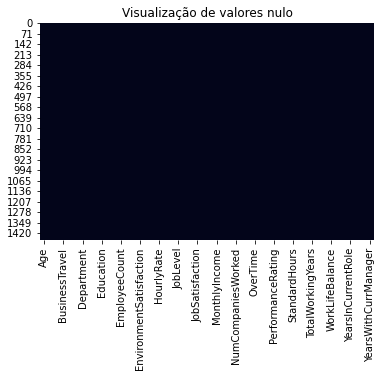

In [ ]:
sns.heatmap(df.isnull(),cbar=False);
plt.title('Visualização de valores nulo'); 

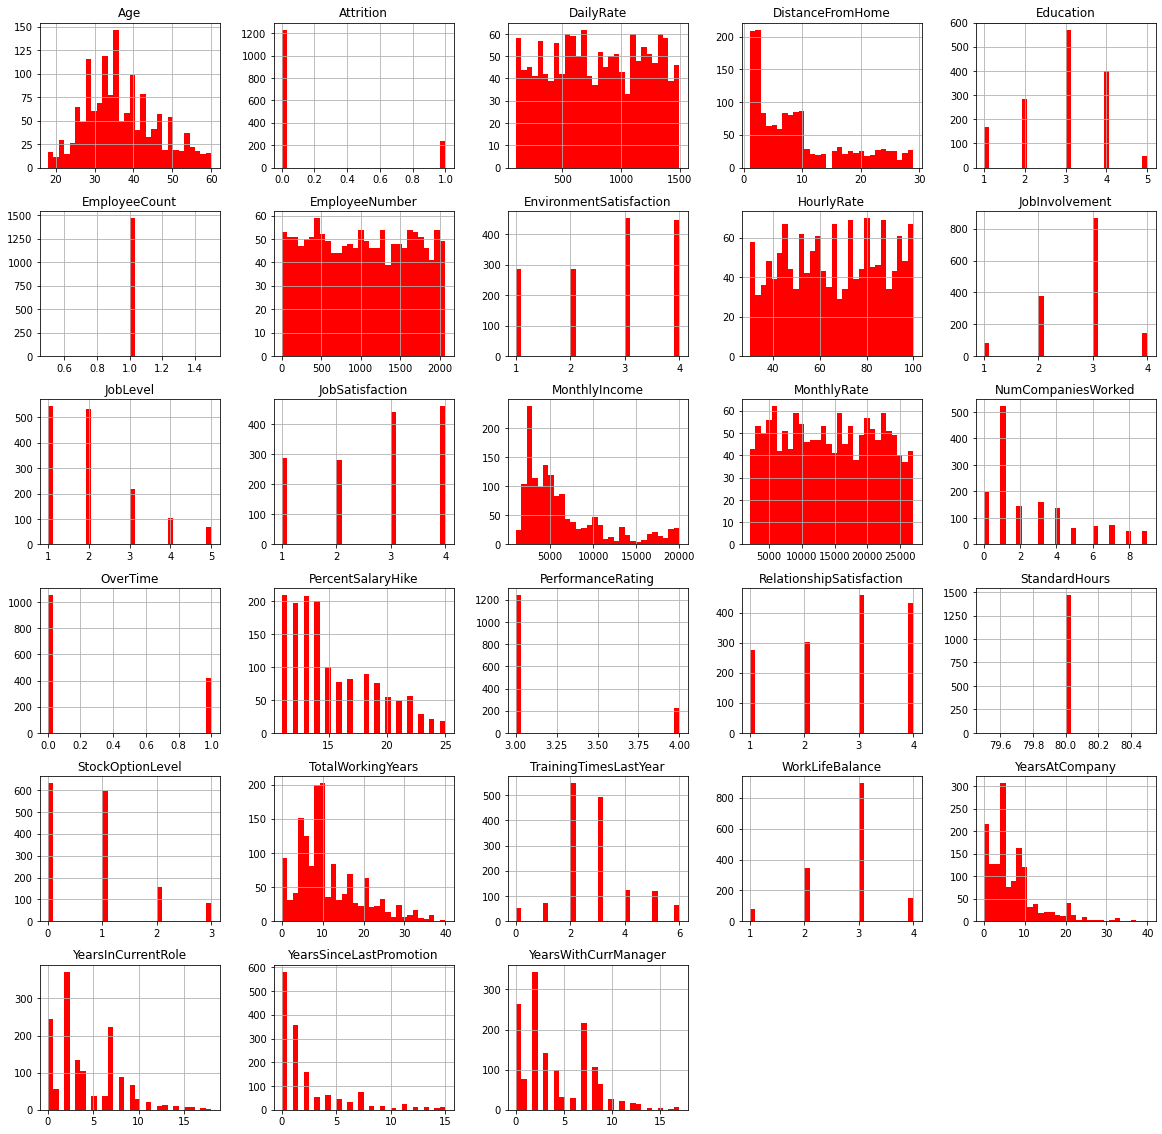

In [ ]:
df.hist(bins=30,figsize=(20,20), color = 'r');

**1º insight** - A maior concentração de pessoas nessa empresa tem  idade a partir de 25 anos até entorno de 40 anos.

**2º insight** - A maioria das pessoas não sairam da empresa. 

**3º insight** - A maioria moram próximo da empresa.

**4º insight** - A maioria dos funcionários é formado.

**5º insight** - A maioria ganha entre USD $ 5000 mil . 

**6º insight** - A maioria tem um grande envolvimento no trabalho.
 
**7º insight** - A maioria não tiram horas extras.

**8º insight** - O aumento de % do salário a maioria é em torno de 14%. 

**9º insight** - A maioria trabalharam apenas em 1 empresa.

**10º insight** - O tempo de treinamento na maioria das vezes é de 2 a 3 horas.

**11º insight** - A maioria estão a 10 anos trabalhando na empresa.




In [ ]:
# Apagando os atributos que não fornecem tantas informações
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

In [ ]:
# Pessoas sairam que saíram da  empresa 
left_df = df.loc[df['Attrition']==1]

# Pessoas que ficaram na empresa 
stayed_df = df[df['Attrition']==0]

In [ ]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**1° insight** - As pessoas mais novas tem tendência a sair.

**2° insight** - As pessoas que saíram da empresa tinham um  sálario menor.

**3° insight** - As distâncias de suas casas para o trabalho eram maiores.

**4° insight** - Tinham um nível de trabalho e escolaridade menor . 

**5° insight** - Tinham um envolvimento no trabalho maior .

**6° insight** - Eram insatisfeitos com o trabalho .

**7° insight** - tiravam mais horas extras. 

**8° insight** - tinham menos anos trabalhados na empresa. 

**9° insight** - Trabalharam poucos anos com os mesmos gerentes.

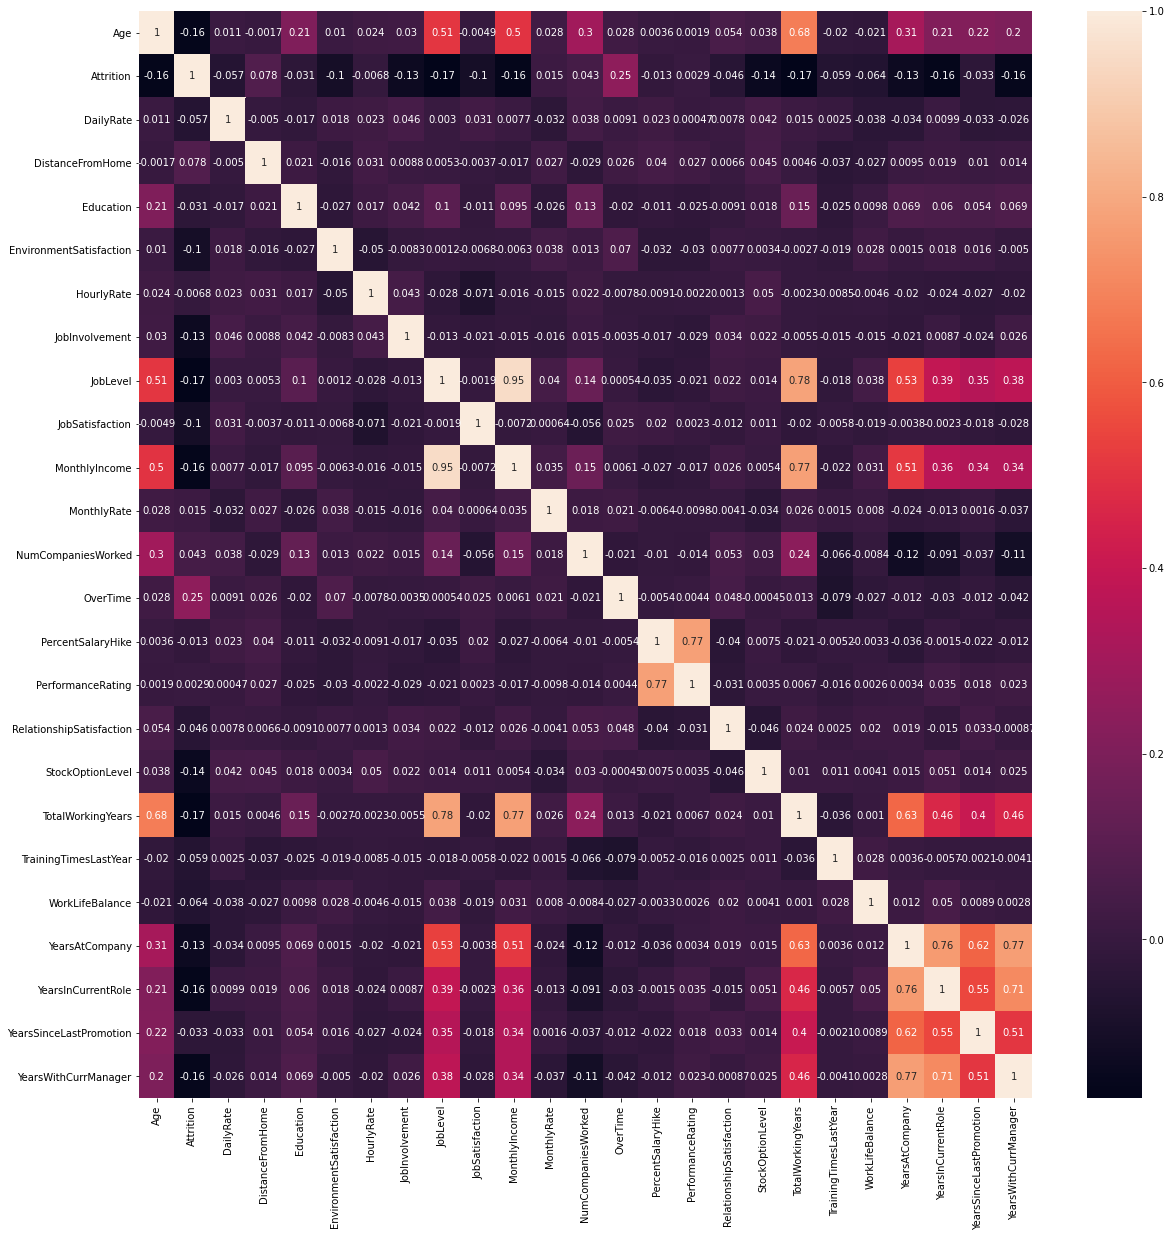

In [ ]:
correlacao = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlacao,annot=True);

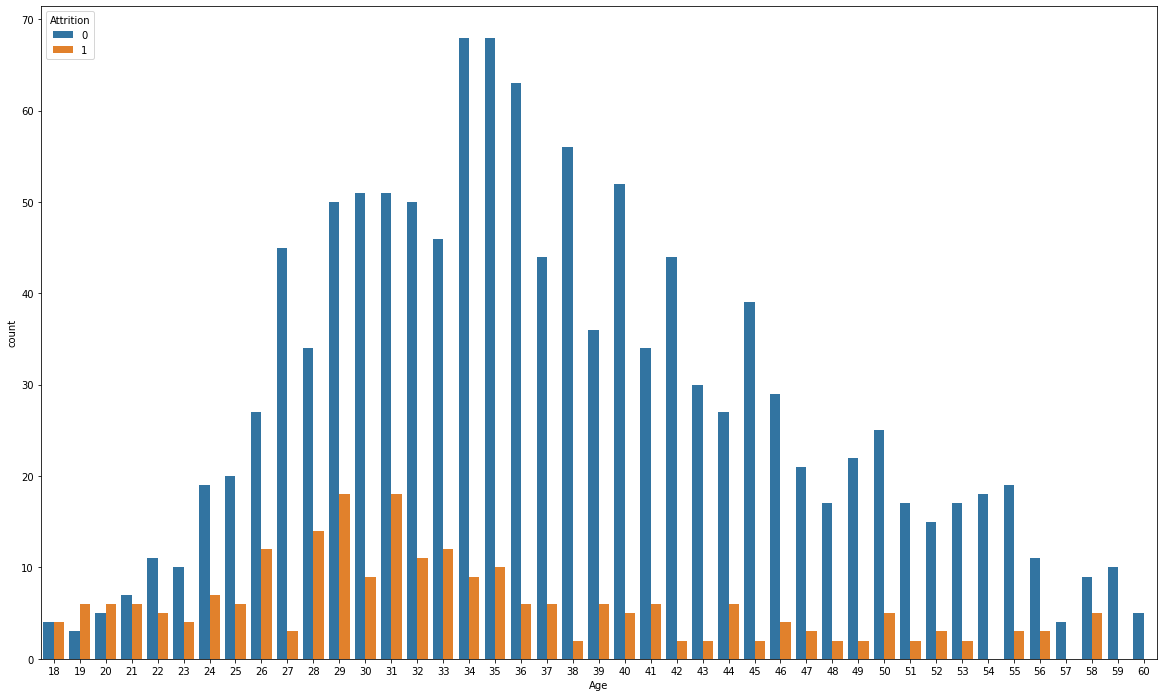

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,12));
sns.countplot(x='Age',data=df, hue='Attrition');
plt.figure(' Idades que tem mais tendência a sair da empresa ');

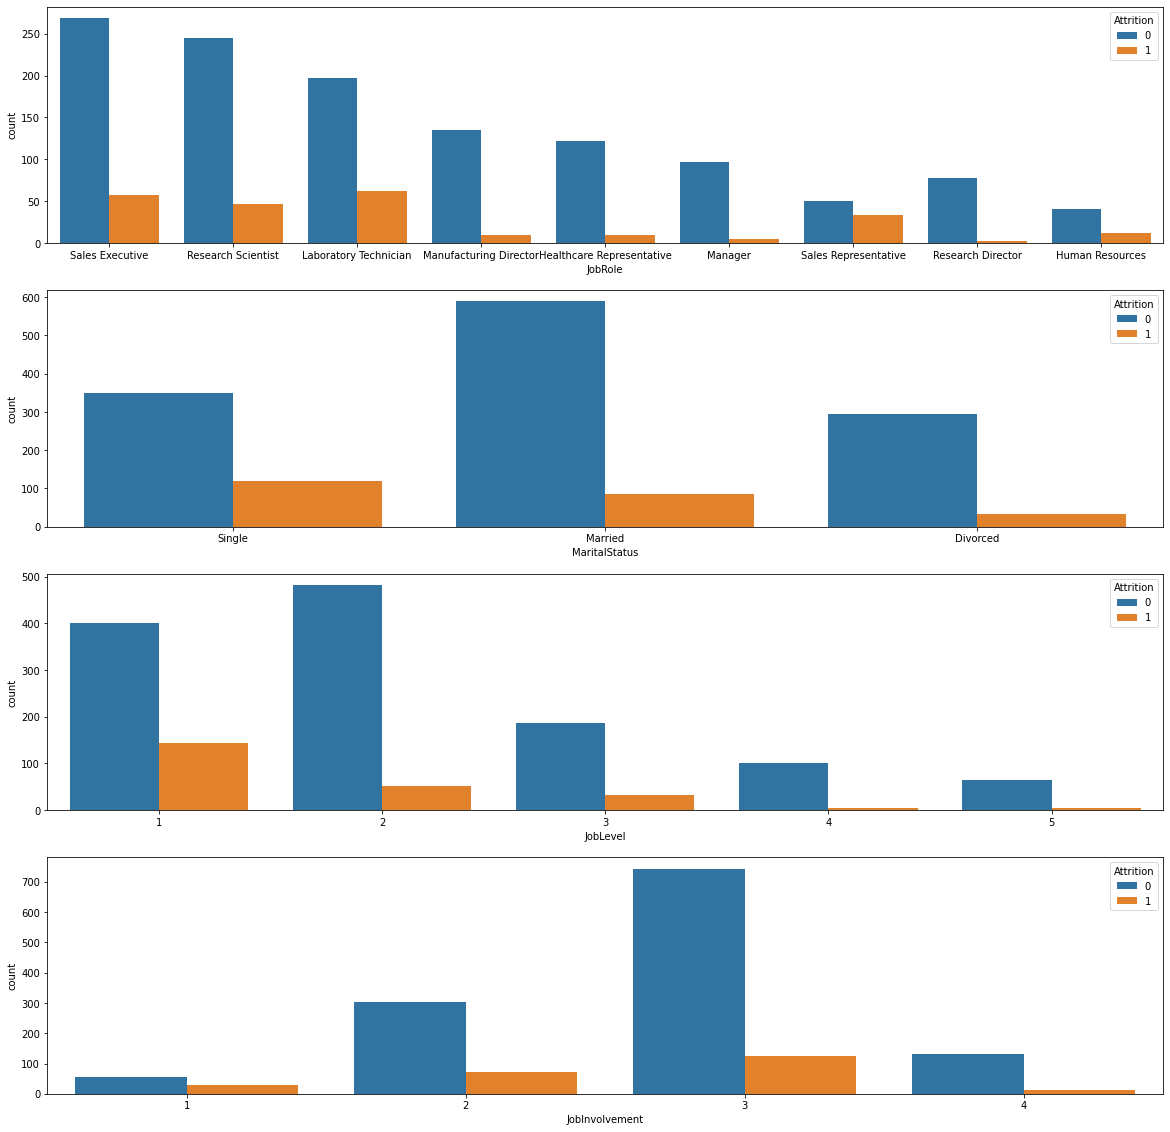

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition',data=df); # representantes de vendas tem a maior tendência de sair da empresa
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition',data=df); #  
plt.subplot(413)
sns.countplot(x='JobLevel', hue='Attrition',data=df);
plt.subplot(414)
sns.countplot(x='JobInvolvement', hue='Attrition',data=df);

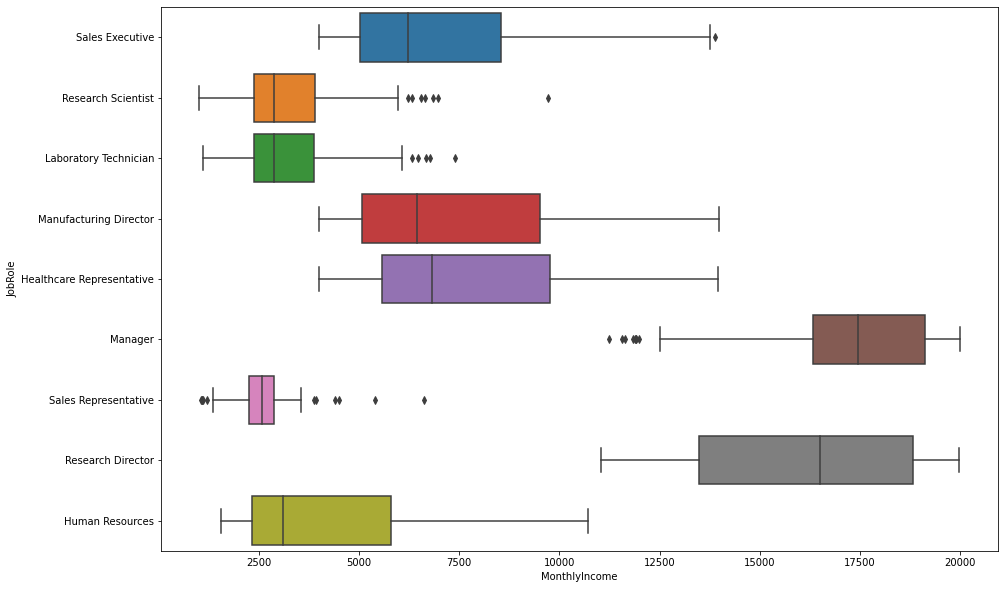

In [ ]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df);

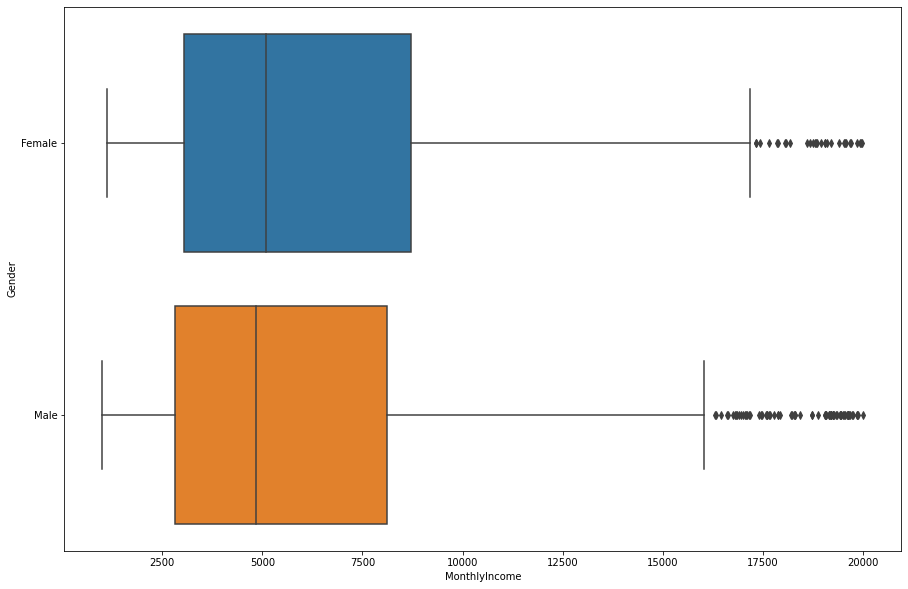

In [ ]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='Gender',data=df);

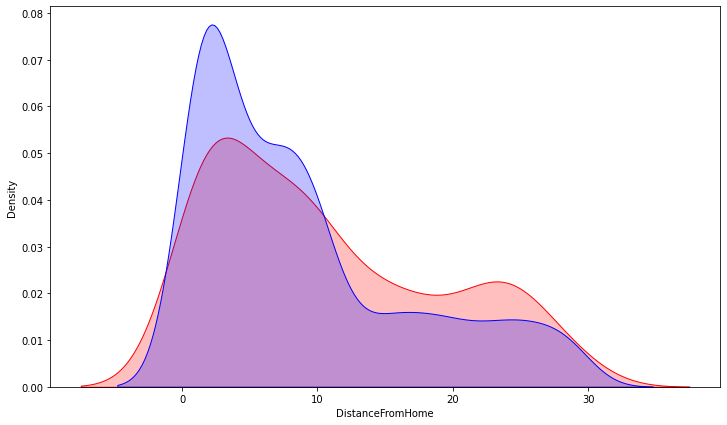

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'],label = 'Funcionários que saíram da empresa', color='r',shade=True)
sns.kdeplot(stayed_df['DistanceFromHome'],label = 'Funcionários que ficaram na empresa', color='b',shade=True)

**insight** - as pessoas que trabalham mais longe de casa tem a tendência de sair da empresa. 

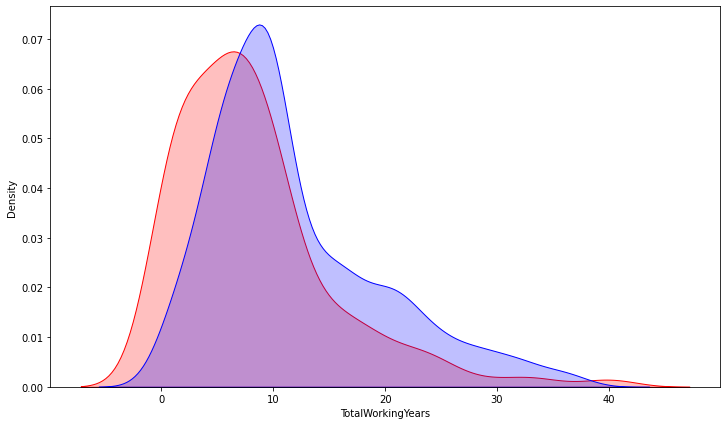

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'],label = 'Funcionários que saíram da empresa', color='r',shade=True);
sns.kdeplot(stayed_df['TotalWorkingYears'],label = 'Funcionários que ficaram na empresa', color='b',shade=True);

**insight** - as pessoas que tem menos anos de trabalho tem a maior tendência de sair.

## Pré Processamento 


In [ ]:
# Filtrando apenas os atributos númericos 
x_num = df[['Age','DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome',	'MonthlyRate', 'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear',	'WorkLifeBalance','YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']]
x_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
# Filtrando apenas os atributos categóricos 
x_cat = df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
y = df[['Attrition']].values
y 


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Transforando os atributos categóricos em númericos 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [ ]:
x_cat= pd.DataFrame(x_cat)
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Padronizando os atributos númericos 
from sklearn.preprocessing import StandardScaler
stander = StandardScaler()
x_num = stander.fit_transform(x_num)

In [ ]:
x_num = pd.DataFrame(x_num)
x_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,-0.628241,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.628241,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.591746,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.628241,-0.330589,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [ ]:
x = pd.concat([x_cat,x_num],axis=1)
x.shape

(1470, 50)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)

In [ ]:
x_train.shape, y_train.shape

((1102, 50), (1102, 1))

In [ ]:
x_test.shape, y_test.shape

((368, 50), (368, 1))

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
regressao = LogisticRegression(C=1.0,random_state=0)
regressao.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
previsao = regressao.predict(x_test)
previsao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9021739130434783

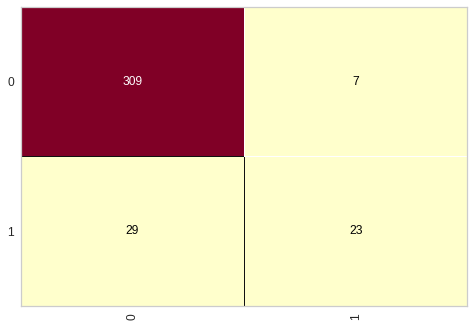

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm_regressao = ConfusionMatrix(regressao);
cm_regressao.fit(x_train,y_train);
cm_regressao.score(x_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,previsao))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       316
           1       0.77      0.44      0.56        52

    accuracy                           0.90       368
   macro avg       0.84      0.71      0.75       368
weighted avg       0.89      0.90      0.89       368



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=30,random_state=0)
random.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
random_pred = random.predict(x_test)
random_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


0.875

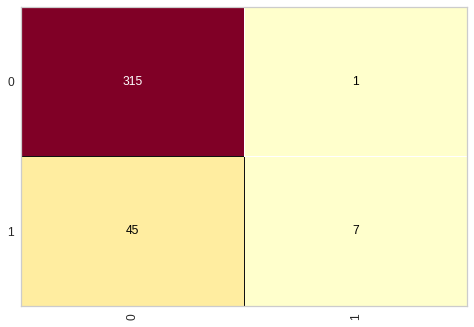

In [ ]:
cm_random = ConfusionMatrix(random)
cm_random.fit(x_train,y_train)
cm_random.score(x_test,y_test)

In [ ]:
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       316
           1       0.88      0.13      0.23        52

    accuracy                           0.88       368
   macro avg       0.88      0.57      0.58       368
weighted avg       0.88      0.88      0.83       368



## Redes Neurais Artificiais 

In [ ]:
# Calculando quando neurônio usar - ((entrada + saida) / 2)
(50 + 2)/2

26.0

In [ ]:
from sklearn.neural_network import MLPClassifier
neuro = MLPClassifier(random_state=0,hidden_layer_sizes=(26,26),activation='relu',solver='adam',verbose=False,max_iter=600,tol=0.00001)
neuro.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(26, 26), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
neuro_pred = neuro.predict(x_test)
neuro_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8586956521739131

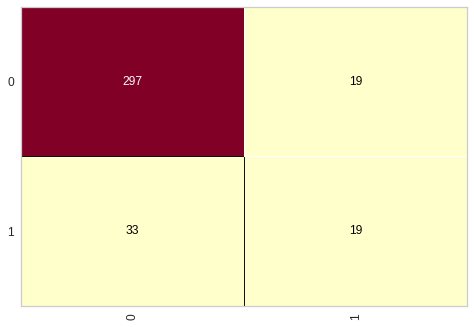

In [ ]:
cm_neuro= ConfusionMatrix(neuro)
cm_neuro.fit(x_train,y_train)
cm_neuro.score(x_test,y_test)

In [ ]:
print(classification_report(y_test,neuro_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       316
           1       0.50      0.37      0.42        52

    accuracy                           0.86       368
   macro avg       0.70      0.65      0.67       368
weighted avg       0.84      0.86      0.85       368



# Encontrar o melhor algoritmo para fazer as **previsões**

## Turning dos parâmetros com GrindSeach
Objetivo: encontrar em cada algoritmo os melhores parâmetros de uso  e em seguida aplicar na validação cruzada para que possam retornar os melhores resultados .



In [ ]:
# Para usar o validação cruzada é  preciso colocar toda a base de dados
x_RH = np.concatenate([x_train,x_test],axis=0)
y_RH = np.concatenate([y_train,y_test],axis=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros_regressao_logistica = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Algoritmo para usar no problema de otimização.
                       'max_iter':[10,40,50,60,100], # Número máximo de iterações tomadas
                       'C':[1.0,1.5,2.0], # criterio de punição por classificação incorreta 
                       'tol':[0.001,0.0001,0.00001]} # número de precisão 

parametros_random_forest = {'criterion':["gini","entropy"],     # função que irá fazer a separação dos dados para gerar as arvores
                            'n_estimators':[10,20,50,100,150],  # número de arvores a ser gerada 
                            'min_samples_split':[1,2,5],        # número minimo de amostra para dividir um nó interno 
                            'min_samples_leaf':[1,3,5]}         # O número mínimo de amostras necessárias para estar em um nó de folha.

parametros_redes_neurais = {'activation':['identity', 'logistic', 'tanh', 'relu'], #  Função de ativação para a camada oculta.
                            'solver':['lbfgs', 'sgd', 'adam'], # função usada para otimização dos pesos 
                            'tol':[0.001,0.0001,0.00001,0.000001], # precisão 
                            'batch_size':[10,56]} # quantidade de registro que ele vai atualizando os pesos

parametros_arvore = {}

In [ ]:
# Regressão Logistica 
grindseach_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=parametros_regressao_logistica)
grindseach_logistic.fit(x_RH,y_RH)
melhores_parametros_logistic = grindseach_logistic.best_params_
melhor_resultado_logistic = grindseach_logistic.best_score_

# Random Forest
grindseach_random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid= parametros_random_forest)
grindseach_random_forest.fit(x_RH,y_RH)
melhores_parametros_random = grindseach_random_forest.best_params_
melhor_resultado_random = grindseach_random_forest.best_score_

# Redes neurais 
grindseach_redes_neurais = GridSearchCV(MLPClassifier(), param_grid= parametros_redes_neurais)
grindseach_redes_neurais.fit(x_RH,y_RH)
melhores_parametros_redes = grindseach_redes_neurais.best_params_
melhor_resultado = grindseach_redes_neurais.best_score_

Streaming output truncated to the last 5000 lines.
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/

In [ ]:
print(f'RegressãoLogistica_parametros: {melhores_parametros_logistic} e Regressão_resultado: {melhor_resultado_logistic}\n') 
print(f'RandomForest_parametros: {melhores_parametros_random} e RandomForest_resultado:{melhor_resultado_random}\n') 
print(f'RedesNeurais_parametros:{melhores_parametros_redes} e RedesNeurais_resultado: {melhor_resultado}') 

RegressãoLogistica_parametros: {'C': 1.5, 'max_iter': 10, 'solver': 'saga', 'tol': 0.001} e Regressão_resultado: 0.8850340136054422

RandomForest_parametros: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} e RandomForest_resultado:0.864625850340136

RedesNeurais_parametros:{'activation': 'logistic', 'batch_size': 10, 'solver': 'sgd', 'tol': 1e-05} e RedesNeurais_resultado: 0.8870748299319728


## Validação Cruzada
objetivo: Encontrar os melhores registros para treinamento e para teste

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
resultados_RegressaoLogistica = []
resultados_RandomForest = []
resultados_RedesNeurais = []

for i in range(30):
  kfold = KFold(n_splits=10,shuffle=True,random_state=i) # vai dividir os registro em 10 e testar 30 vezes

  RegressaoLogistica = LogisticRegression()
  score_regressao = cross_val_score(RegressaoLogistica,x_RH,y_RH,cv=kfold)
  resultados_RegressaoLogistica.append(score_regressao.mean())

  RandomForest = RandomForestClassifier(n_estimators=30)
  score_random= cross_val_score(RandomForest, x_RH, y_RH, cv=kfold)
  resultados_RandomForest.append(score_random.mean())

  RedesNeurais = MLPClassifier(activation='logistic',batch_size=56,solver='adam',tol=0.0001)
  score_redesneurais = cross_val_score(RedesNeurais, x_RH, y_RH,cv=kfold)
  resultados_RedesNeurais.append(score_redesneurais.mean())

In [ ]:
resultados = pd.DataFrame({'RegressaoLogistica':resultados_RegressaoLogistica, 'RandomForest':resultados_RandomForest,'RedesNeurais':resultados_RedesNeurais})
resultados.describe()

,RegressaoLogistica,RandomForest,RedesNeurais
count,30.000000,30.000000,30.000000
mean,0.882313,0.856712,0.882812
std,0.002322,0.002453,0.002946
min,0.877551,0.851701,0.876190
25%,0.880952,0.855272,0.880442
50%,0.882993,0.856463,0.882993
75%,0.883673,0.858503,0.885544
max,0.886395,0.861224,0.887755


## Teste de normalidade dos resultados
objetivo: saber se os resultados dos algorimos estão em uma distribuição normal

In [ ]:
from scipy.stats import shapiro

alpha = 0.05 # confiança
shapiro(resultados_RegressaoLogistica),shapiro(resultados_RandomForest),shapiro(resultados_RedesNeurais) # retorna o p_values de cada resultado.
# p_values >= alpha ( indica que a distribuição é normal)
# p_values < alpha (indica que a distribuição não é normal)

((0.9272251129150391, 0.041459254920482635),
 (0.9709787964820862, 0.5662926435470581),
 (0.9720292091369629, 0.5960639119148254))

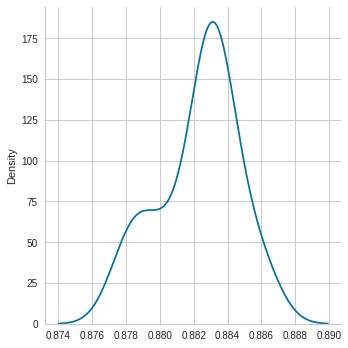

In [ ]:
sns.displot(resultados_RegressaoLogistica,kind='kde') 

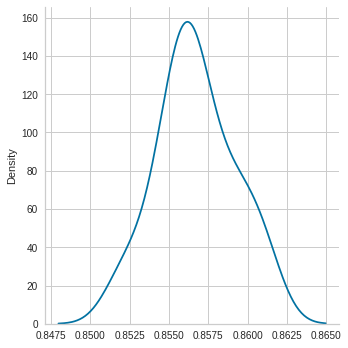

In [ ]:
sns.displot(resultados_RandomForest,kind='kde')

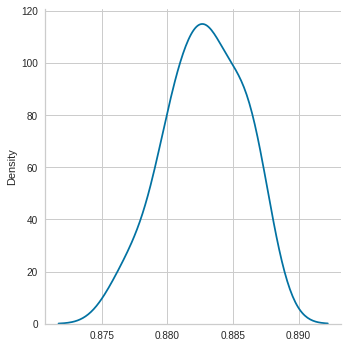

In [ ]:
sns.displot(resultados_RedesNeurais,kind='kde')

## Teste de hipotese Anova
objetivo: saber se existe alguma diferença estatístico nos dados


In [ ]:
from scipy.stats import f_oneway
_,p = f_oneway(resultados_RegressaoLogistica,resultados_RandomForest,resultados_RedesNeurais)

In [ ]:
alpha = 0.05
if p < alpha:
  print('Hipotese nula rejeitada. Há diferença estatística')
else:
  print('hiposte alternativa rejeitada. Não há diferença estatística')

Hipotese nula rejeitada. Há diferença estatística


In [ ]:
resultados_algoritmos = {'accuracy':np.concatenate([resultados_RegressaoLogistica,resultados_RandomForest,resultados_RedesNeurais]),
                         'Algoritmos':['RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica','RegressaoLogistica',
                                       'RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest',
                                       'RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais','RedesNeurais']}

In [ ]:
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,accuracy,Algoritmos
0,0.882993,RegressaoLogistica
1,0.883673,RegressaoLogistica
2,0.879592,RegressaoLogistica
3,0.884354,RegressaoLogistica
4,0.882993,RegressaoLogistica
...,...,...
85,0.882313,RedesNeurais
86,0.883673,RedesNeurais
87,0.887755,RedesNeurais
88,0.882993,RedesNeurais


## Teste turke
como houve diferença estatística nos resultados, aplico o teste turke para descobrir qual é o melhor algoritmo de se usar para fazer as previsões.

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
compara_algoritmo = MultiComparison(resultados_algoritmos['accuracy'],resultados_algoritmos['Algoritmos'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
teste_estatisticos = compara_algoritmo.tukeyhsd()
print(teste_estatisticos)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1          group2       meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
RandomForest       RedesNeurais   0.0261  0.001  0.0245 0.0277   True
RandomForest RegressaoLogistica   0.0256  0.001   0.024 0.0272   True
RedesNeurais RegressaoLogistica  -0.0005 0.7177 -0.0021 0.0011  False
---------------------------------------------------------------------


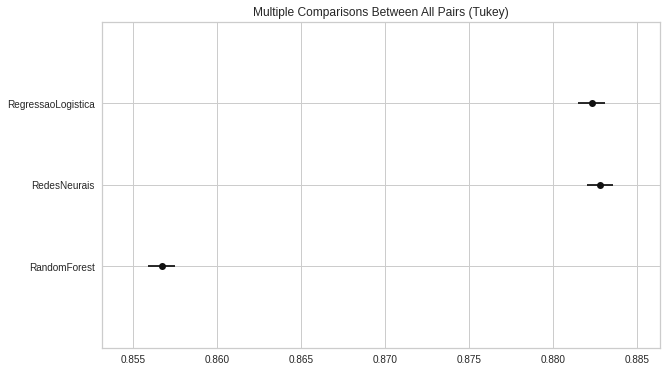

In [ ]:
teste_estatisticos.plot_simultaneous(); # O melhor algoritmo é Regressão Logística 

In [ ]:
classificador_RegressaoLogistica  = LogisticRegression()
classificador_RegressaoLogistica.fit(x_RH,y_RH)

In [ ]:
classificador_RedesNeurais =  MLPClassifier(activation='logistic',batch_size=56,solver='adam',tol=0.0001,)
classificador_RedesNeurais.fit(x_RH,y_RH)

In [ ]:
RedesNeurais.fit(x_train,y_train)

## Salvando os melhores classificadores

In [ ]:
import pickle 
pickle.dump(classificador_RegressaoLogistica,open('RandomForest_finalizado.sav','wb'))
pickle.dump(classificador_RedesNeurais,open('RedesNeurais_finalizado.sav','wb'))